# **Исследование крупного интернет магазина**

**Цель исследования:** приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты в целях увеличения выручки

**Ход исследования:**

- Изучение общей информации датасетов
- Предобработка данных
- Приоритизация гипотез
- Анализ A/B-теста

# **Описание данных**



**Файл /datasets/hypothesis.csv**

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Файл /datasets/orders.csv**

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue`— выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.


**Файл /datasets/visitors.csv**

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### **Откроем файлы и изучим общую информацию датасетов**

In [1]:
# импортируем библиотеки необходимые для работы с данными 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt

In [2]:
try:
    hypothesis, orders, visits = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv'),
    )
except:
    hypothesis, orders, visits = (
        pd.read_csv(r'C:\Users\niksmns\Desktop\online_store research\hypothesis.csv'),
        pd.read_csv(r'C:\Users\niksmns\Desktop\online_store research\orders.csv'),
        pd.read_csv(r'C:\Users\niksmns\Desktop\online_store research\visitors.csv'),
    )

In [3]:
def general_info(data):
    display(data.head(10))
    display(data.info())
    display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))
    display('Количество дубликатов:', data.duplicated().sum())
    display(data.columns)
    display(data.describe())

#### **Данные по гипотезам**

In [4]:
general_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,0
Hypothesis,0.000000
Reach,0.000000
Impact,0.000000
Confidence,0.000000
Efforts,0.000000


'Количество дубликатов:'

0

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


#### **Данные о заказах**

In [5]:
general_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,0
transactionId,0.000000
visitorId,0.000000
date,0.000000
revenue,0.000000
group,0.000000


'Количество дубликатов:'

0

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


#### **Данные о визитах**

In [6]:
general_info(visits)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,0
date,0.000000
group,0.000000
visitors,0.000000


'Количество дубликатов:'

0

Index(['date', 'group', 'visitors'], dtype='object')

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Изучили информацию о датасетах, пропусков и дубликтов обнаружено не было

Необходимо будет привести название колонок в датасете `hypothesis` к нижнему регистру и поменять тип данных у дат
    
</div>

### **Предобработка данных**

In [7]:
# приведём названия колонок к нижнему регистру 
hypothesis.columns = hypothesis.columns.str.lower()

In [8]:
# поменяем тип данных у дат
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
# проверим пользователей, которые могут быть в двух группах одновременно
visitors_duplicated_group = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
visitors_duplicated_group.columns = ['groups', 'group_names']
visitors_duplicated_group = visitors_duplicated_group.query('groups > 1')
visitors_duplicated_group.head()

,groups,group_names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Видим, что у нас всего 5 пользователей состоят в обоих группах. Их можно удалить из выборки, но решил оставить, так как такое количество не повлияет на результаты
    
</div>

### **Приоритизация гипотез**

In [10]:
# увеличим лимит знаков ячейки и выведим гипотезы
pd.options.display.max_colwidth = 300
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [11]:
# рассчитаем приоритизацию гипотез через фреймворк ICE
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis.head(10).sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [12]:
# рассчитаем приоритизацию гипотез через фреймворк RICE
hypothesis['rice'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis.head(10).sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

При расчётах приоритизации гипотез через фреймворк ICE были выялены две наиболее важных гипотезы 1 и 9, их важности способствует наиболее высокие показатели: 
    
- `impact`(насколько сильно изменение повлияет на пользователей)
    
- `confidence`(насколько вы уверены, что это изменение повлияет на пользователей именно так)

При расчёте же приоритизации гипотез через фреймворк RICE приоритизация поменялась за счёт `Reach`(охват пользователей), тем самым охват повлиял на изменение приоритизации и наиболее важными уже стали гипотезы 3 и 8
    
Видим, что отличие этих фрейворков является только тем, что в `RICE` есть охват пользователей, за счёт неё и меняется приоритизация
    
</div>
 

### **Анализ A/B-теста**

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# соберём агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] 
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))

In [14]:
# соберём агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = (
    datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))

In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [16]:
display(cumulativeData.head(10))
display(cumulativeData.tail(10))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


,date,group,orders,buyers,revenue,visitors
52,2019-08-27,A,495,449,3514698,16376
53,2019-08-27,B,548,504,5232260,16523
54,2019-08-28,A,512,464,3615820,16970
55,2019-08-28,B,576,526,5328268,17177
56,2019-08-29,A,534,484,3936510,17547
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736
61,2019-08-31,B,640,586,5907760,18916


In [17]:
# проверим корректны ли данные 
print(cumulativeData['date'].min())
print(cumulativeData['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


#### *График кумулятивной выручки по группам*

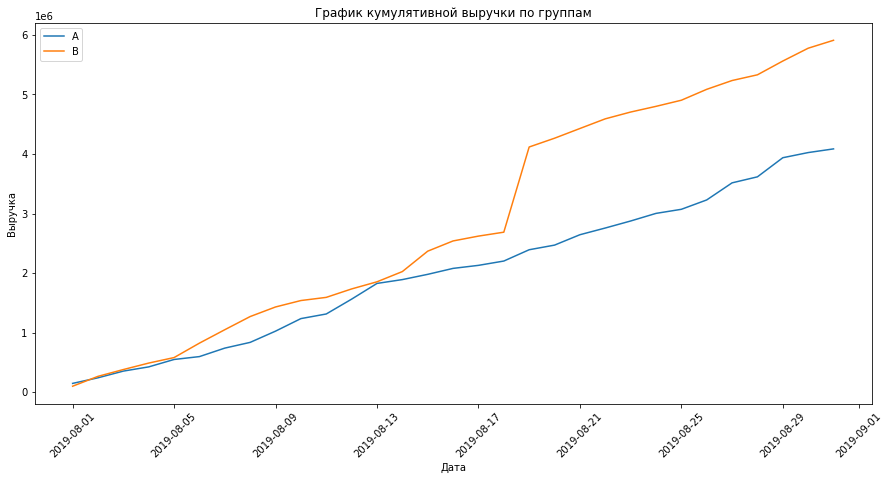

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.legend() 
plt.xticks(rotation=45)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Видим, что выручка равномерно учеличивается по 17 августа равномерно в обеих группах, но затем выручка группы B значительно увеличивается(видим резкий скачок) и продолжает равномерно расти

Это вероятно может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке

</div>

#### *График кумулятивного среднего чека по группам*

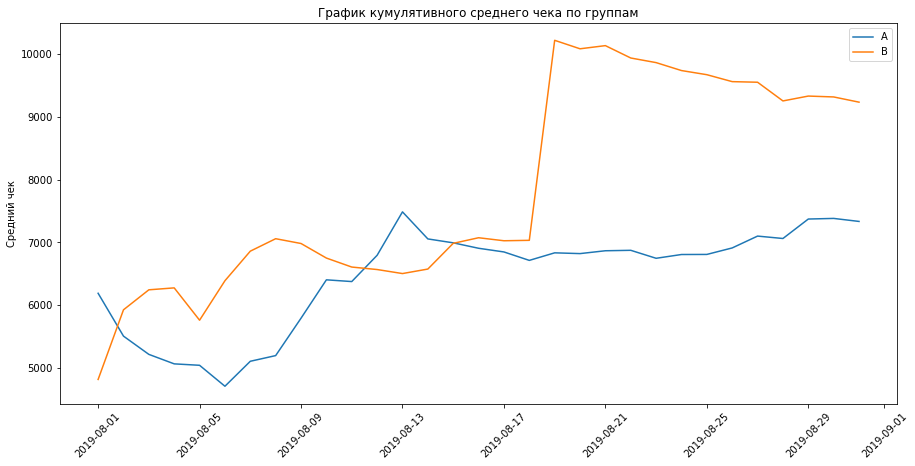

In [19]:
plt.figure(figsize=(15,7))
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Средний чек')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Видим, что средний чек весь тест протекал неравномерно. У группы А сначала средний чек падал, но потом появился скачок с увеличением за которым последовало удержание чека примерно в одном диапозоне. У группы B же средний чек поднимался плавными скачками, но также был резкий скачок как и у выручки 17 августа за которым следовало снижение выручки
    
Скорее всего в группу B с 17 августа начали попадать крупные заказы
</div>

#### *График относительного изменения кумулятивного среднего чека группы B к группе A*

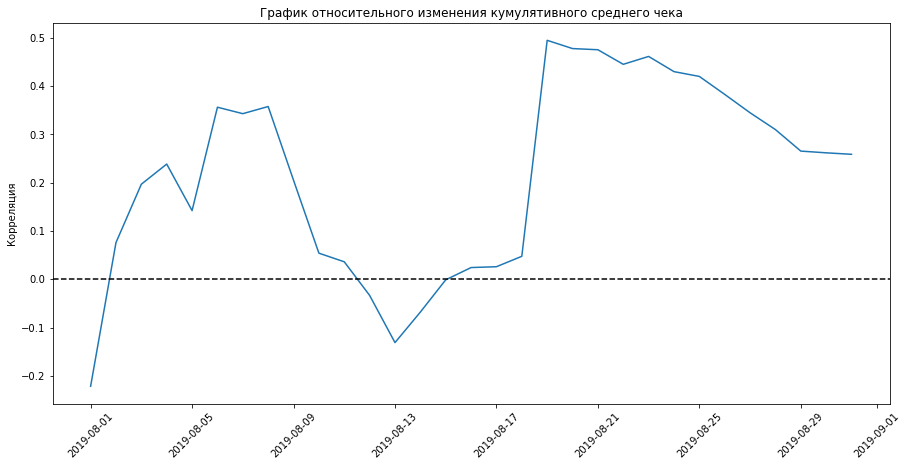

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#
plt.figure(figsize=(15,7))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека')
plt.xticks(rotation=45)
plt.ylabel('Корреляция')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Во многих точках наблюдаются резкие скачки. Скорее всего дело в больших заказах или выбросах

</div>

#### *График кумулятивного среднего количества заказов на посетителя по группам*

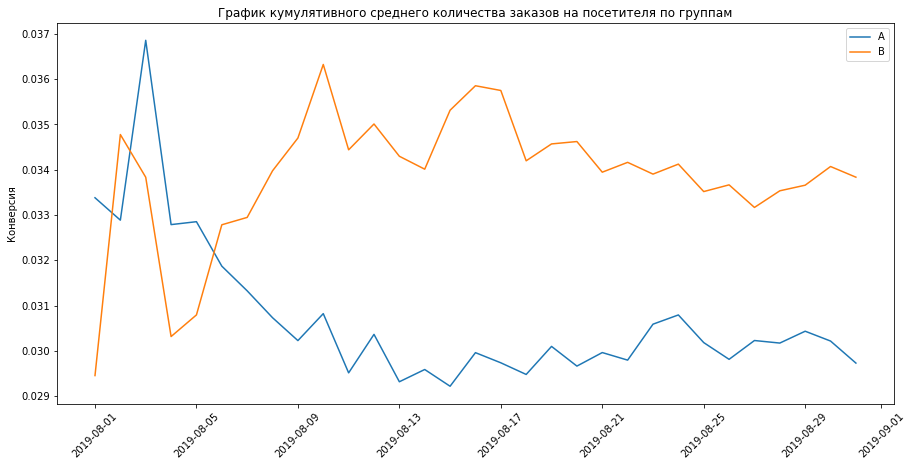

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,7))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend() 
plt.xticks(rotation=45)
plt.ylabel('Конверсия')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Видим, что по началу конверсии обоих групп увеличились и через некоторое время пошли резко в низ.

Группа А продолжила падать, а группа B наоборот начало расти и 9 августа группы зафиксировались.


</div>

#### *График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A*

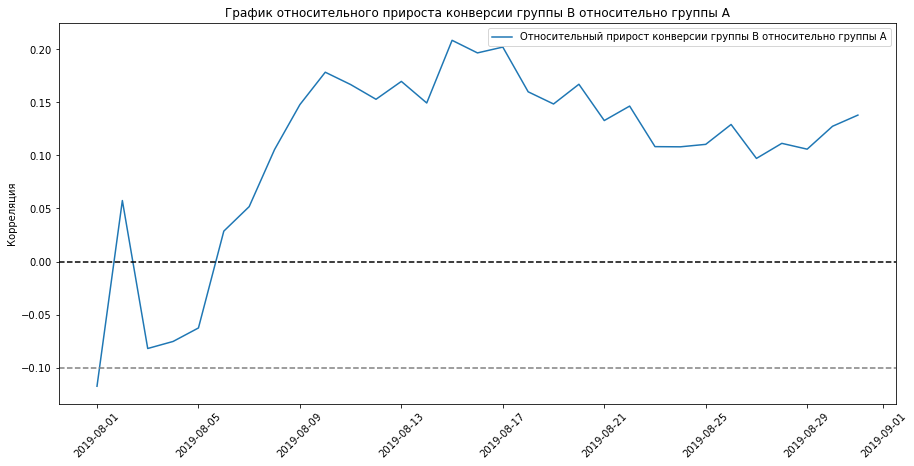

In [22]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

plt.figure(figsize=(15,7))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, \
         label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного прироста конверсии группы B относительно группы A')
plt.legend() 
plt.xticks(rotation=45)
plt.ylabel('Корреляция')
plt.show()


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
В начале теста группа B колебалась в большую сторону, то в меньшую чем в группе A, затем взлетела вперёд и колебалась с небольшими уменьшениями

#### *Точечный график количества заказов по пользователям*

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

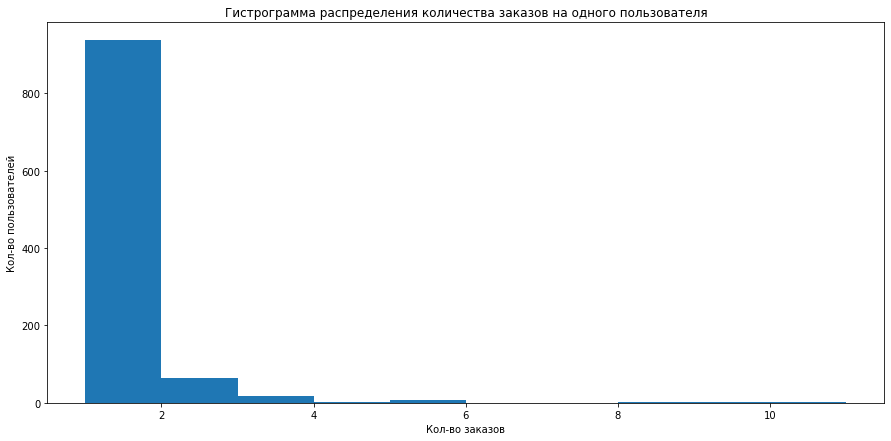

In [24]:
# построим гистрограмму распределения количества заказов на одного пользователя
plt.figure(figsize=(15,7))
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Кол-во заказов')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Видим, что основная доля заказов были единичны. Также вполне значительны заказы, которые совершали 2-3 раза
</div>

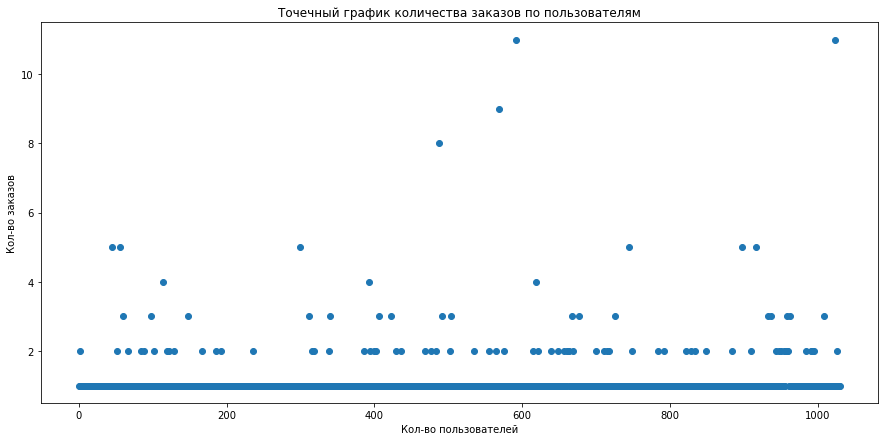

In [25]:
# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.xlabel('Кол-во пользователей')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Прошлые выводы подтвердились, нужно выяснить считать ли их аномалиями
</div>

#### *Перцентили количества заказов на пользователя*

In [37]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))
perc_ord = np.percentile(ordersByUsers['orders'], 95)

[2. 4.]


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Видим, что не более 2 раз заказывали 5% пользователей. Разумно будет отсеять заказы больше 2 и отсеять аномальных пользователей
</div>

#### *Точечный график стоимостей заказов*

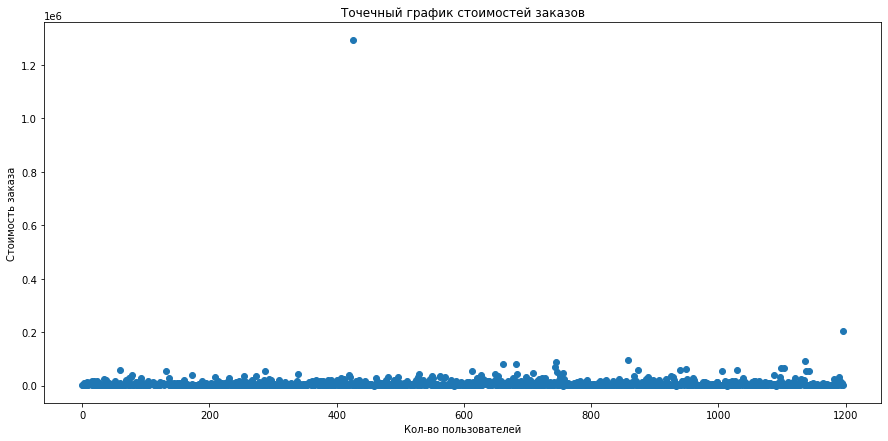

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 7))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Кол-во пользователей')
plt.show()

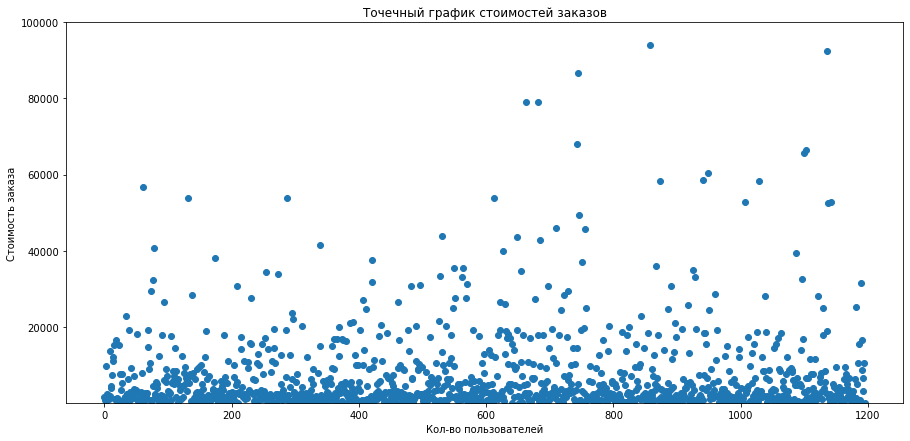

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 7))
plt.scatter(x_values, orders['revenue'])
plt.ylim([50, 100000])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Кол-во пользователей')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
По-первому графику непонятно, что просходит, поэтому ограничим ось. На новомо графике видим, что пользователи в основном тратят до 20 тысяч
</div>

#### *Перцентили стоимости заказов*

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))
perc_reven = np.percentile(orders['revenue'], 95)

[28000.  58233.2]


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Видим, что 5% заказов больше 28 тысяч, следовательно заказы больше 28 тысяч стоит отсеять
</div>

#### *Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным*

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
**Нулевая гипотеза H₀:** Средние пользовательские рейтинги платформ Xbox One и PC **равны**

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги платформ Xbox One и PC **не равны**

*α* = **5**% - уровень значимости

**Метод проверки гипотез:** непараметрический критерий Манна — Уитни(U-критерий Манна-Уитни)
</div>

In [30]:
visitorsADaily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (
    visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
    .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [32]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = .05 
results = st.mannwhitneyu(sampleA, sampleB)


print('p-value: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


print("Относительный проигрыш/выигрыш группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Отвергаем нулевую гипотезу
Относительный проигрыш/выигрыш группы B: 0.138


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Статистическая значимая разность присутствует, поэтому нулевая гипотеза отвергается(p-value меньше 0.05). Результаты группы B больше группы A на `13.8%`
</div>

#### *Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным*

**Cформулируем гипотезы:**

H0: различий в среднем чеке между группами нет

H1: различия в среднем чеке между группами есть

In [34]:
alpha = .05 

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-value: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Относительный проигрыш/выигрыш группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный проигрыш/выигрыш группы B: 0.259


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Статистически значимая разность отсутствует(p-value значительно больше 0.05). Средний чек группы B на `25.9%` больше, чем у группы A
</div>

#### *Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным*

In [40]:
# узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > perc_ord]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > perc_reven]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
Аномальных пользователей: 68


In [ ]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [ ]:
alpha = .05 

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Относительный проигрыш/выигрыш группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Статистическая значимая разность присутствует, поэтому нулевая гипотеза отвергается(p-value меньше 0.05). Среднее количество заказов группы B на `17.3%` процентных пункта больше, чем у группы A. После фильтрации разница между группами увеличилась еще в большую сторону на `3.5%` процентных пункта
</div>

#### *Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным*

In [ ]:
alpha = .05 

results = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-value: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


print(
    'Относительный проигрыш/выигрыш группы B: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Статистически значимая разность отсутствует(p-value значительно больше 0.05) по-прежнему. Средний чек группы A стал на `2% ` больше, чем у группы B. Выходит после фильтрации средний чек группы B уменьшился аж на `27.9%` процентных пункта, а это говорит что мы нашли эти аномалии.
</div>

### **Вывод**

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
<br>
<b>1. Открыли файлы и изучили данные</b>
    
- пропусков, дубликатов обнаружено не было
- названия колонок hypothesis не соответсвует хорошему стилю
- обнаружены некорректный тип данных у дат

<b>2. Провели предобработку</b>
    
- привели названия колонок hypothesis к нижнему регистру
- изменили тип данных у дат
- выявили посетителей, которые состоят в обоих группах AB-теста
    
<b>3. Провели приоритизацию гипотез</b>

- сделали приоритезацию по фреймворку ICE
- сделали приоритезацию по фреймворку RICE
    
<b>4. Проанализировали AB-тест</b>

- Построили график кумулятивной выручки по группам
- Построили график кумулятивного среднего чека по группам
- Построили график относительного изменения кумулятивного среднего чека группы B кгруппе A
- Построили график кумулятивной конверсии
- Построили график относительного прироста конверсии группы B относительно группы A
- Построили точечный график количества заказов на пользователя
- Выявили перцентили количества заказов на пользователя
- Построили точечный график стоимости заказов
- Выявили перцентили стоимости заказов
- Рассчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- Рассчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
- Рассчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- Рассчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным


<br>
<br>
<b>Цель исследования: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты в целях увеличения выручки</b>
    

<br>
<br>
<b>В ходе приоритизации гипотез и анализа AB-теста были выявлены такие закономерности:</b>

1. В ходе приоритизации предпочтение приходится на фреймворк RICE, так как метод ICE имеет недостаток субьективности.
2. Из график кумулятивной конверсии можем видеть, что график стабилизирован. Теперь можем исключить проблему подглядывания.
3. Статистическая значимость конверский между группами присутствует в «сырых» данных и «очищенных». После избавлений от аномалий конверсия группы B выросла на 3.5%, тем самым группа B опережает группы A на 17.3%.
4. Статистическая значимость различий среднего чека между группами отсутствует, как в «сырых» данных, так и в «очищенных». После удаления аномалий средний чек группы B уменьшился по отношению группы A на 27.9%. Как раз это видно на графике кумулятивного среднего чека и по графику относительного изменения кумулятивного среднего чека.

    
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px">
<b>Рекомендации:</b>

Завершить проведение теста, признать его успешным. Группа B по результатам лидирует.
</div>    
</div>
